In [78]:
import pandas as pd
import numpy as np
import seaborn as sns


In [79]:
df=pd.read_csv('h1b_kaggle.csv')

In [80]:
df.keys()

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [81]:
import matplotlib.pyplot as plt

In [82]:
plt.plot(df[df['JOB_TITLE']=='DATA ENGINEER'][['JOB_TITLE','YEAR']].groupby(by=['YEAR']).count())

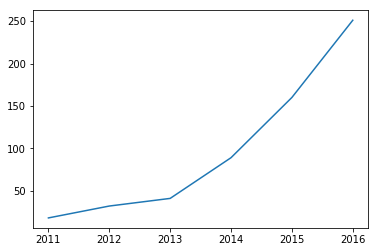

In [83]:
plt.show()

In [153]:
countlist=[]
for i ,j in df[df['JOB_TITLE']=='HARDWARE ENGINEER'][['JOB_TITLE','WORKSITE']].groupby(by=['WORKSITE']):
    countlist.append([i,len(j)])
countdf=pd.DataFrame(countlist,columns=['WORKSITE','count'])
#countdf=countdf.set_index('WORKSITE')                                           
countdf=countdf.sort_values(by=['count'],ascending=False)

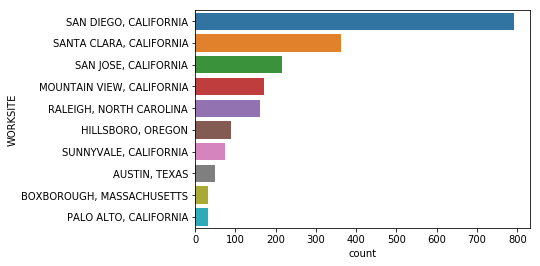

In [167]:
sns.barplot(data=countdf.head(10),y='WORKSITE',x='count',orient='h')
plt.show()

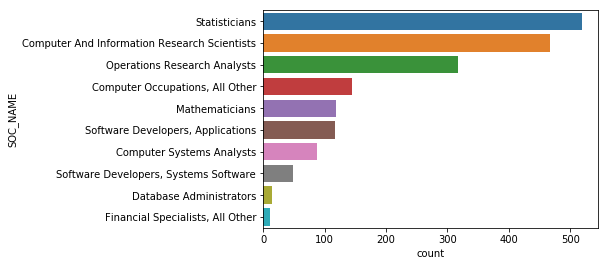

In [235]:

countlist=[]
df['SOC_NAME']=df['SOC_NAME'].map(lambda x:str(x).title())
for i ,j in df[df['JOB_TITLE']=='DATA SCIENTIST'][['SOC_NAME','JOB_TITLE']].groupby(by=['SOC_NAME']):
    countlist.append([i,len(j)])
countdf=pd.DataFrame(countlist,columns=['SOC_NAME','count'])
#countdf=countdf.set_index('WORKSITE')                                           
countdf=countdf.sort_values(by=['count'],ascending=False)
sns.barplot(data=countdf.head(10),y='SOC_NAME',x='count',orient='h')

plt.show()


In [186]:
countlist=[]
company_total_df=[]
for i,j in df.groupby(by=['EMPLOYER_NAME']):
    company_total_df.append([i,len(j)])
    for k,q in j.groupby(by=['YEAR']):
        countlist.append([i,k,len(q)])


In [202]:
countlistdf=pd.DataFrame(countlist,columns=['Emp_name','year','count'])
company_total_df_dataframe=pd.DataFrame(company_total_df,columns=['Emp_name','count'])

                                           
company_total_df_dataframe=company_total_df_dataframe.sort_values(by=['count'],ascending=False)
names=company_total_df_dataframe.head(10)['Emp_name'].tolist()


In [237]:
top10_comp=countlistdf[countlistdf['Emp_name'].isin(names)]

In [238]:
hash_index=[]
for i in names:
    hash_index+=list(top10_comp[top10_comp['Emp_name']==i].index)
    

In [239]:
top10_comp=top10_comp.loc[hash_index]

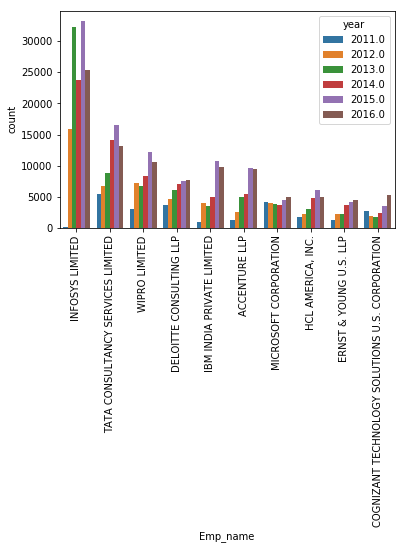

In [242]:
sns.barplot(data=top10_comp,x='Emp_name',y='count',hue='year',orient='v')
plt.xticks(rotation=90)

plt.show()

In [243]:
df.keys()

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [245]:
countlist=[]
for i,j in df.groupby(by=['EMPLOYER_NAME']):
    for k,q in j.groupby(by=['YEAR']):
        total=len(q)
        for a,b in q.groupby(by=['CASE_STATUS']):
            countlist.append([i,k,a,len(b)/total])
countlistdf=pd.DataFrame(countlist,columns=['Emp_name','year','status','count'])



In [294]:
top_50=company_total_df_dataframe.head(50)['Emp_name'].tolist()


In [299]:
countlistdf.status.unique().tolist()

['CERTIFIED',
 'DENIED',
 'WITHDRAWN',
 'CERTIFIED-WITHDRAWN',
 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED',
 'REJECTED',
 'INVALIDATED']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


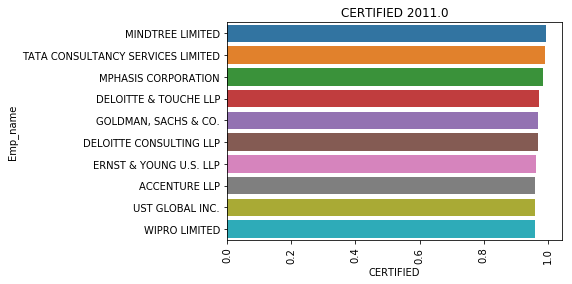

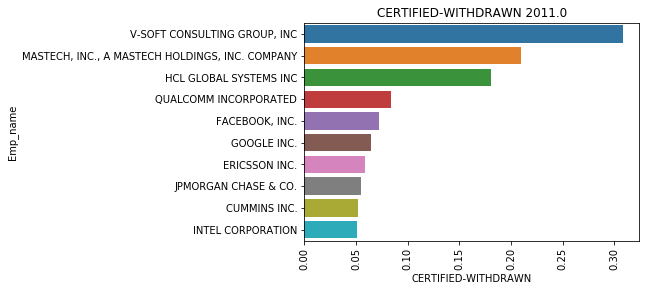

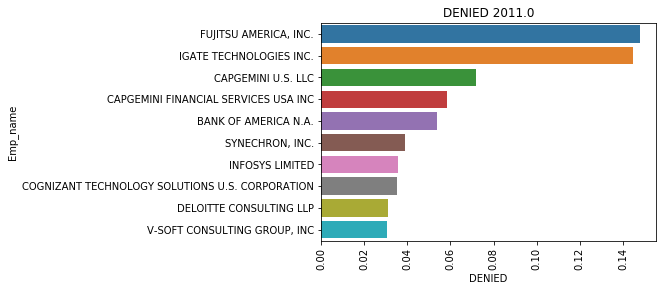

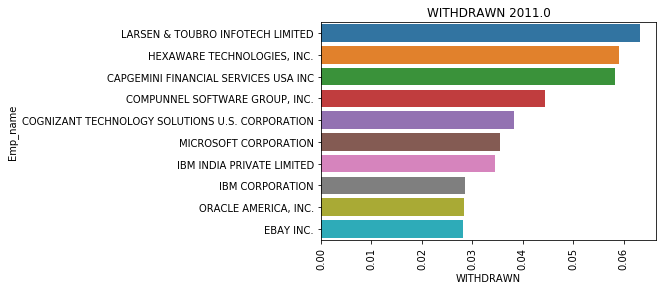

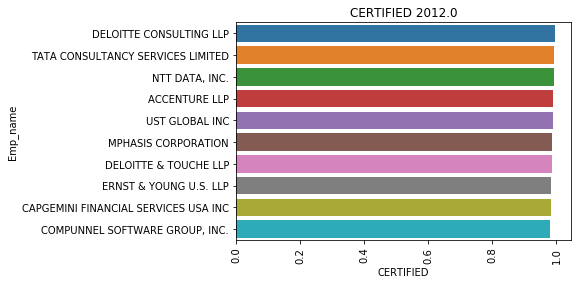

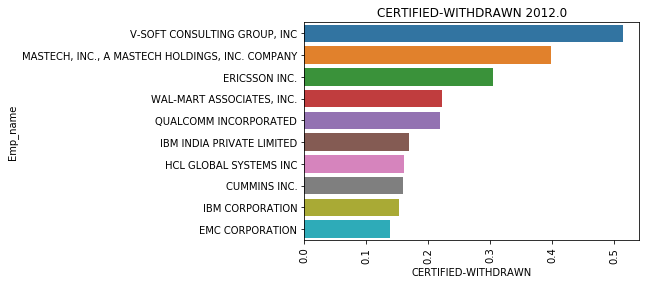

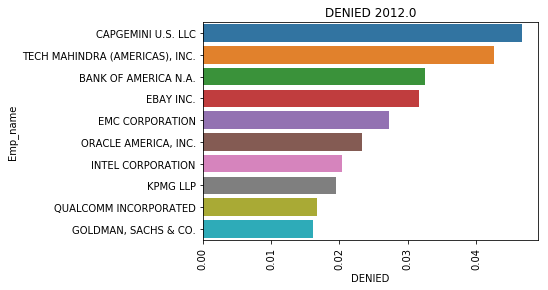

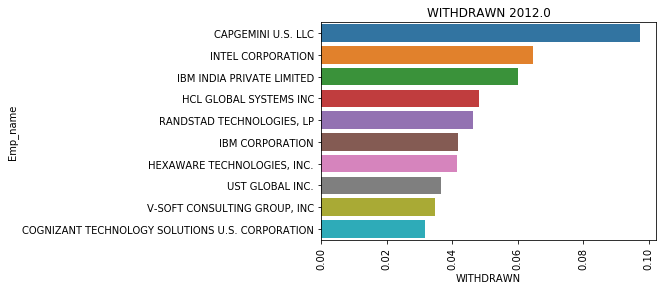

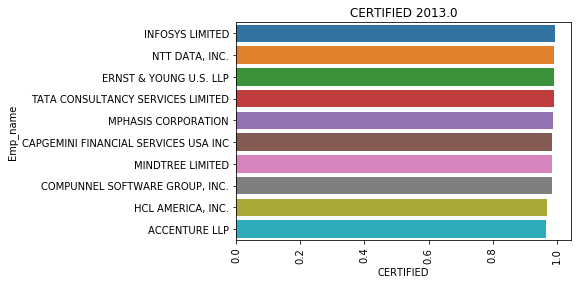

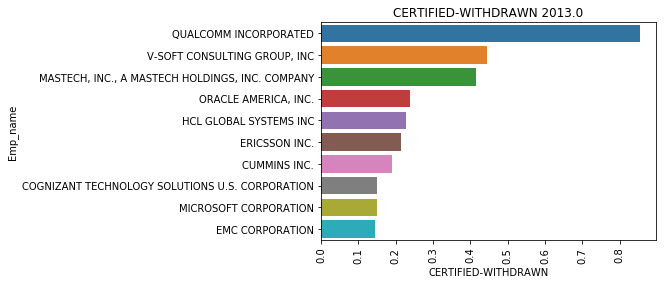

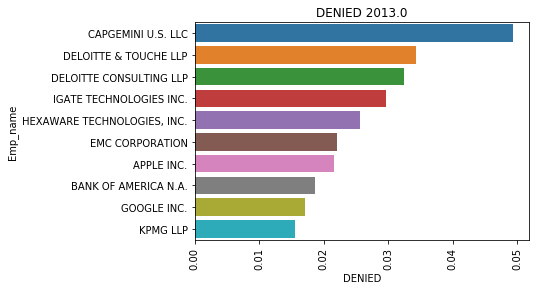

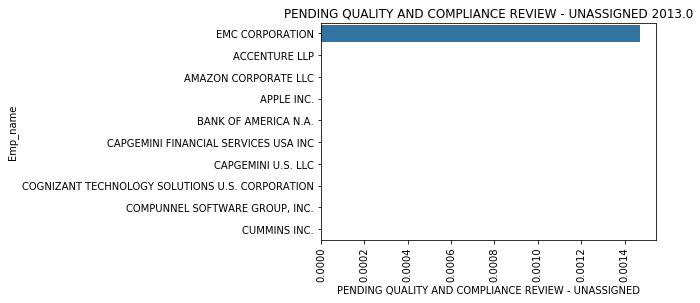

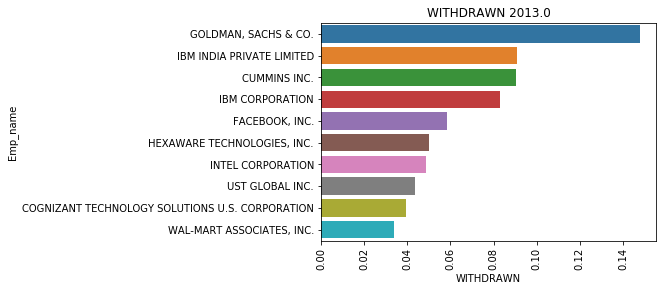

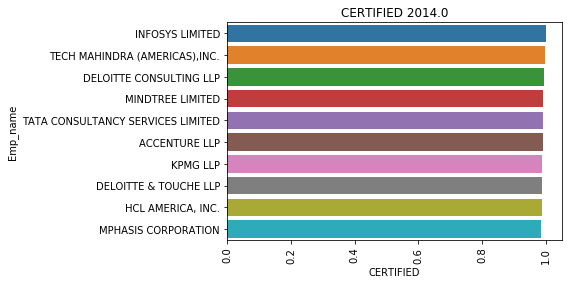

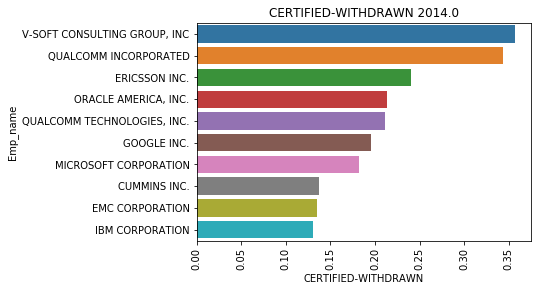

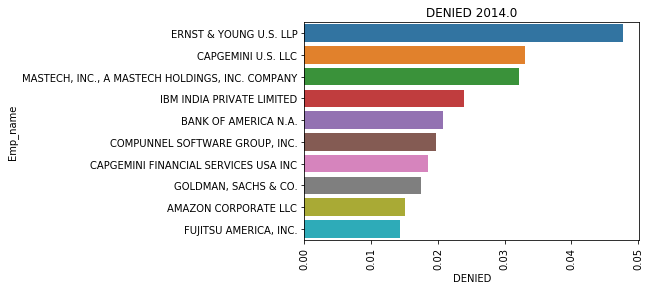

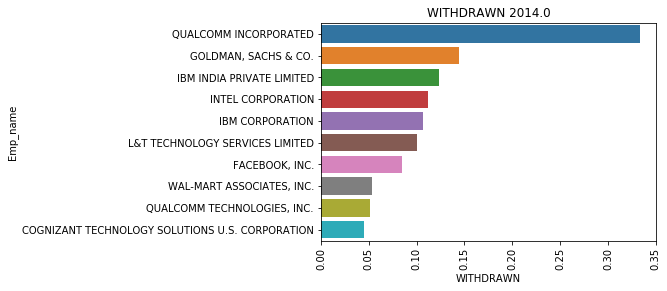

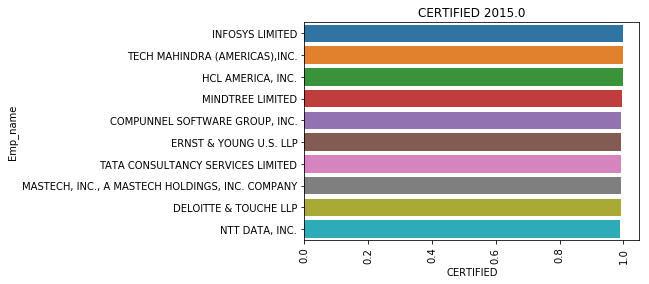

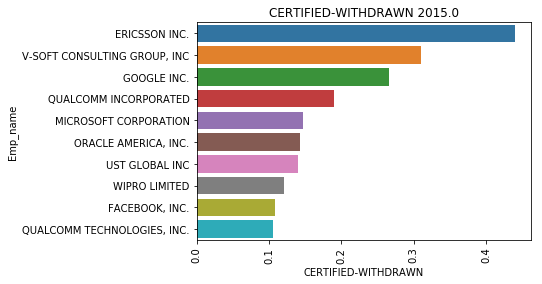

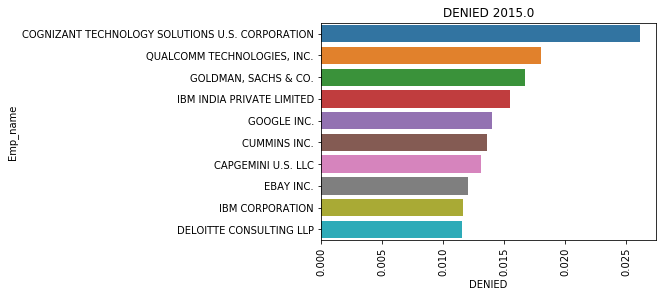

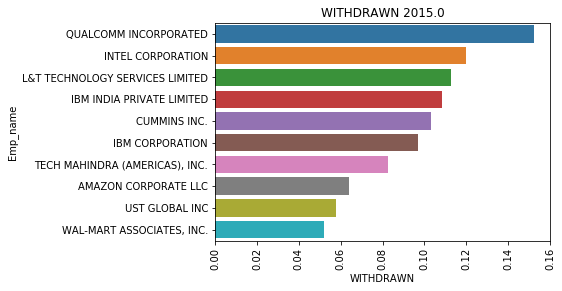

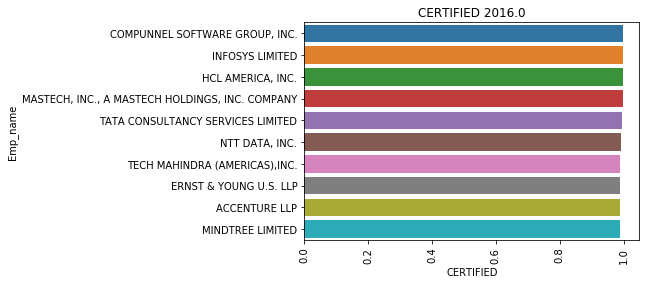

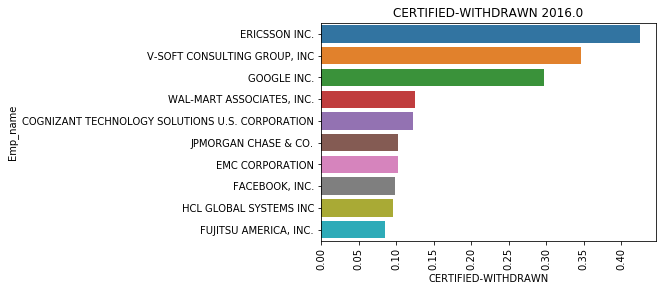

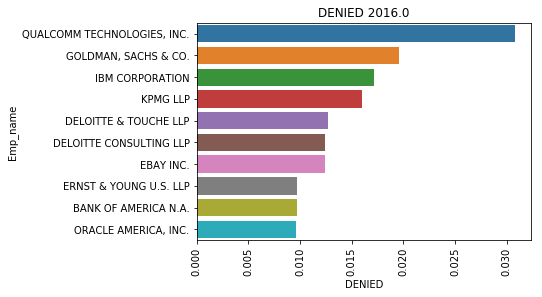

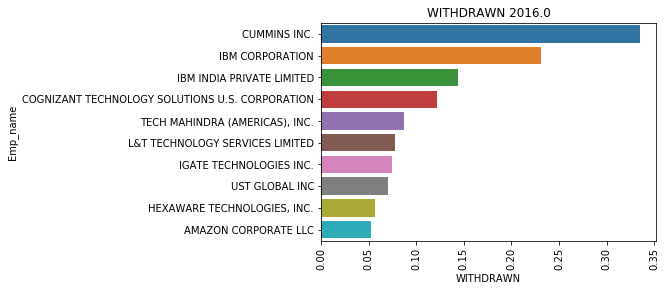

In [305]:
for i in sorted(countlistdf['year'].unique().tolist()):
    for j in sorted(countlistdf.status.unique().tolist()):
        
       
        try:
            dummy=pd.pivot_table(countlistdf[(countlistdf['Emp_name'].isin(top_50))&
                                  (countlistdf['year']==i)],
                                 index=['Emp_name','year'], 
                       columns='status', values='count').sort_values(by=[j],ascending=False)[[j]].head(10)
            sns.barplot(data=dummy,y=dummy.index.get_level_values('Emp_name'),x=j,orient='h')
            
            plt.xticks(rotation=90)
            plt.title('{} {}'.format(j,i))
            plt.figure()
        except:
            pass
plt.show()

In [244]:
df.keys()

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')